<a href="https://colab.research.google.com/github/JoaoP29/abcia/blob/main/insurance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing data
df = pd.read_csv('insurance.csv')

#visualizing data frame
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
#Separando os dados
X = df.drop(columns = 'expenses')
y = df.expenses

In [4]:
#Trata variáveis categóricas - Parte 1
#Cria uma classificação para o IMC

def bmi_estimator(column):
  if column < 18.5:
    return 'underweight'
  elif (column >= 18.5) and (column <= 24.9):
    return 'healthy weight'
  elif (column >= 25) and (column <= 29.9):
    return 'overweight'
  else:
    return 'obese'

In [5]:
X['bmi_class'] = df.bmi.map(bmi_estimator)
X

,age,sex,bmi,children,smoker,region,bmi_class
0,19,female,27.9,0,yes,southwest,overweight
1,18,male,33.8,1,no,southeast,obese
2,28,male,33.0,3,no,southeast,obese
3,33,male,22.7,0,no,northwest,healthy weight
4,32,male,28.9,0,no,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,obese
1334,18,female,31.9,0,no,northeast,obese
1335,18,female,36.9,0,no,southeast,obese
1336,21,female,25.8,0,no,southwest,overweight


In [6]:
#Tratando variáveis categórias binárias
sex_dict = {'male': 0, 'female': 1}
smoker_dict = {'yes': 1, 'no': 0}

X['sex'] = X.sex.map(sex_dict)
X['smoker'] = X.smoker.map(smoker_dict)
X

,age,sex,bmi,children,smoker,region,bmi_class
0,19,1,27.9,0,1,southwest,overweight
1,18,0,33.8,1,0,southeast,obese
2,28,0,33.0,3,0,southeast,obese
3,33,0,22.7,0,0,northwest,healthy weight
4,32,0,28.9,0,0,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,northwest,obese
1334,18,1,31.9,0,0,northeast,obese
1335,18,1,36.9,0,0,southeast,obese
1336,21,1,25.8,0,0,southwest,overweight


In [7]:
#Agora vamos transformar variáveis categóricas em numéricas
columns_to_encode = ['region', 'bmi_class']

In [8]:
#Utiliza o OneHotEncoder para tratar as variáveis categórias
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(
    X[columns_to_encode])
encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))
X[encoded_cols] = encoder.transform(X[columns_to_encode])

In [9]:
X = X.drop(columns = 'region')
X

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.9,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.8,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.0,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.7,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.9,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.9,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.9,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.8,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
columns_to_scale = ['age', 'bmi', 'children']
X[columns_to_scale].head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [11]:
#Melhoria. Coloca os dados numéricos em uma escala entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X[columns_to_scale])
X[columns_to_scale] = scaler.transform(X[columns_to_scale])

In [12]:
X = X.drop(columns = 'bmi_class')
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.320755,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479784,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458221,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.180593,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347709,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#Separando dados de treino de dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [17]:
from xgboost import XGBRegressor

In [18]:
model_xgboost = XGBRegressor(n_jobs = -1, n_estimators = 1000,
                             early_stopping_rounds = 50, random_state = 42)
model_xgboost.fit(X_train, y_train, eval_set = [(X_train, y_train),
                  (X_test, y_test)])

[0]	validation_0-rmse:13024.29347	validation_1-rmse:12984.88844
[1]	validation_0-rmse:9667.17712	validation_1-rmse:9653.42315
[2]	validation_0-rmse:7425.10986	validation_1-rmse:7490.90182
[3]	validation_0-rmse:5968.62044	validation_1-rmse:6161.73464
[4]	validation_0-rmse:5053.74391	validation_1-rmse:5326.11792
[5]	validation_0-rmse:4451.63767	validation_1-rmse:4921.36213
[6]	validation_0-rmse:4086.43012	validation_1-rmse:4672.88020
[7]	validation_0-rmse:3830.18016	validation_1-rmse:4594.68862
[8]	validation_0-rmse:3641.01653	validation_1-rmse:4537.57184
[9]	validation_0-rmse:3492.91052	validation_1-rmse:4543.89106
[10]	validation_0-rmse:3367.33920	validation_1-rmse:4531.11037
[11]	validation_0-rmse:3281.23600	validation_1-rmse:4545.00364
[12]	validation_0-rmse:3236.12397	validation_1-rmse:4554.23635
[13]	validation_0-rmse:3169.68941	validation_1-rmse:4572.76582
[14]	validation_0-rmse:3130.36869	validation_1-rmse:4580.44331
[15]	validation_0-rmse:3042.44329	validation_1-rmse:4620.51847


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_xgboost.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending = False)

,Feature,Importance
4,smoker,0.904943
2,bmi,0.023377
0,age,0.015556
9,bmi_class_healthy weight,0.011506
8,region_southwest,0.008716
6,region_northwest,0.007270
5,region_northeast,0.007120
11,bmi_class_overweight,0.006042
3,children,0.005965
7,region_southeast,0.005312


<Axes: xlabel='Importance', ylabel='Feature'>

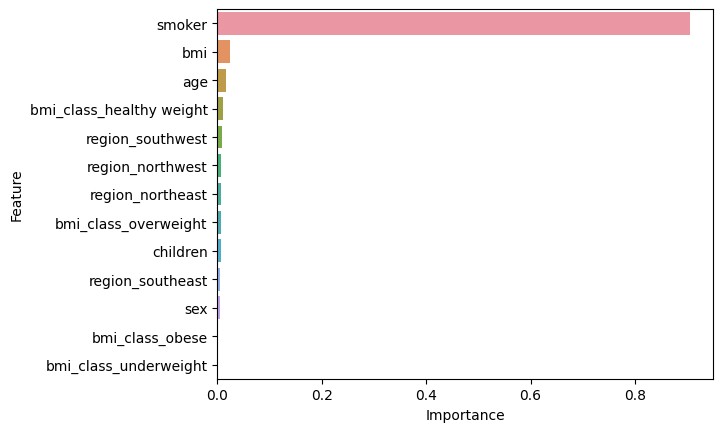

In [25]:
sns.barplot(data = feature_importance_df.sort_values('Importance', ascending = False), y = 'Feature', x = 'Importance')

In [26]:
model_xgboost.best_ntree_limit

11

In [28]:
#Verificando o resultado do modelo com o teste (predição)
y_pred = model_xgboost.predict(X_test)
y_pred

array([10305.799 ,  5595.551 , 26835.852 ,  9314.859 , 34114.98  ,
        5634.52  ,  1451.5039, 14038.986 ,  5067.463 , 12552.089 ,
       17711.66  ,  7403.6255,  4921.5503, 44722.46  , 46758.33  ,
       44140.63  , 10201.851 , 42458.906 , 10462.531 , 23397.168 ,
        5048.5723,  9768.004 ,  2938.679 ,  3117.8567, 11500.382 ,
       12968.214 , 14213.917 ,  6749.579 , 12096.021 ,  3194.1316,
        7502.7153, 12153.369 ,  2788.914 ,  4808.965 ,  3228.2498,
        9498.498 ,  3694.7651,  8136.865 , 23267.043 , 38354.957 ,
        5137.043 ,  5504.191 , 14199.754 , 16105.374 ,  6625.8516,
       13294.008 , 11120.731 ,  4543.0117, 41632.645 ,  6199.355 ,
       15677.149 ,  3490.9788,  6687.315 ,  1540.8527, 12353.652 ,
       10607.354 ,  3074.3877, 38971.293 , 12330.095 , 13688.217 ,
       13493.914 ,  5301.6387, 17967.975 ,  7026.0283, 11507.643 ,
        5591.637 , 17336.732 , 12579.666 ,  5993.991 ,  2766.5906,
        7578.1016, 13579.936 , 10484.263 ,  7749.2085,  8701.1

In [29]:
r2 = r2_score(y_test, y_pred)
print('Coeficiente de Determinação (R^2):', r2)

Coeficiente de Determinação (R^2): 0.8677544051036136


In [31]:
rmse = mean_squared_error(y_test, model_xgboost.predict(X_test), squared = False)
nrmse = rmse/(max(y) - min(y))

print('The RMSE is: {}', format(rmse))
print('The NRMSE is: {}', format(nrmse))

The RMSE is: {} 4531.110365974266
The NRMSE is: {} 0.07232585020269047
